<!--Header-->
<div>
    <div class="row" style="color: #4D4D4D;font-size: 15px;padding-bottom: 20px">
        <div class="col-md-7">
            <img src="http://materials.cv.uoc.edu/cdocent/common/img/logo-uoc.png" alt="Logo UOC" class="img-responsive" style="margin:20px 0px 0px">
        </div>
        <div class="col-md-5">
            <h1 style="margin:15px 0px 0px;font-size: 40px;">Limpieza del conjunto de datos y análisis estadístico</h1>
            <div style="text-align:left;margin-top: 5px;"></div>
        </div>
    </div>
    <div class="row" style="background: #FCB517;padding: 10px 20px;">
        <div class="col-md-6">
            <div>Trabajo Final de Máster</div>
        </div>
        <div class="col-md-6">
            <div style="text-align:right;">Autor: Lissette Muñoz Guillen <span style="margin-left: 30px;">Profesor: 
Laia Subirats Maté</span></div>
        </div>
    </div>
</div>
<!--/Header-->

## Introducción

En esta actividad aprenderemos a limpiar los datos, el paso necesario antes de hacer cualquier análisis o modelo. Esto incluye: tratar los datos vacíos o datos que faltantes, convertir tipos de datos y transformar variables.

El conjunto de datos corresponde a ... obtenido de ...

Lo primero que haremos, será leer los datos y visualizar las primeras filas con los respectivos campos.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

dataScore = pd.read_csv('../conjunto_datos/_data.csv', sep=';')
dataScore.head(10)

,Id,Score,Date
0,3175,8.5,2020-03-30 18:35:15+02
1,3209,7.5,2020-03-30 17:16:20+02
2,3229,8.5,2020-03-30 11:23:42+02
3,3229,No terminado,2020-03-30 10:48:41+02
4,3229,No terminado,2020-03-30 10:47:22+02
5,3229,No terminado,2020-03-30 10:45:33+02
6,3250,No terminado,2020-03-30 00:18:22+02
7,3203,7.5,2020-03-29 23:46:41+02
8,3190,7.5,2020-03-29 23:08:47+02
9,3190,No terminado,2020-03-29 22:46:08+02


In [37]:
dataScore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3358 entries, 0 to 3357
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      3358 non-null   int64 
 1   Score   3358 non-null   object
 2   Date    3358 non-null   object
dtypes: int64(1), object(2)
memory usage: 78.8+ KB


Utilizamos la funcion `describe()` para obtener datos como la media, meadiana, máx, mín, std y conteos de nuestras columnas `Id`, `Score` y `Date`.

In [3]:
dataScore.Id.describe()

count    3358.000000
mean     2694.338297
std       413.779925
min         2.000000
25%      2282.000000
50%      2746.000000
75%      3015.000000
max      3396.000000
Name: Id, dtype: float64

In [4]:
dataScore.Score.describe()

count             3358
unique              22
top       No terminado
freq              1614
Name: Score, dtype: object

In [5]:
dataScore.Date.describe()

count                       3358
unique                      3340
top       2018-02-16 17:16:32+01
freq                           3
Name: Date, dtype: object

Se observa que se cuenta con 3358 registros y variables de tipo numerico y objeto. 

## Conversión de variables. 

Previo a la limpieza de datos vamos a crear las nuevas variables, una vez transformadas las variables se realizará la limpieza y análisis respectivo. 

#### Cálculo de intentos totales

Hacemos uso de la tabla pivote y luego hacemos los cálculos con la función `aggfunc`

In [6]:
countTotal = pd.pivot_table(
    dataScore, 
    index=['Id'], 
    values=['Score'], 
    aggfunc={'Score': 'count'}
)

#Mostramos las primeras filas
countTotal.head(10)

,Score
Id,
2,11
2032,1
2213,7
2215,13
2217,8
2218,29
2219,27
2220,19
2221,16


In [38]:
countTotal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233 entries, 2 to 3396
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Score   233 non-null    int64
dtypes: int64(1)
memory usage: 3.6 KB


#### Cálculo de intentos incompletos

Como la variable `score` contiene valores entre números y textos, primero identificamos las filas con intentos "No terminado" y contamos.

In [7]:
Incompletos= dataScore[(dataScore['Score']=='No terminado') ]

countIncom = pd.pivot_table(
      Incompletos, 
      index=['Id'], 
      values=['Score'], 
      aggfunc={'Score':'count'}
)

#Mostramos las primeras filas
countIncom.head(10)

,Score
Id,
2,11
2032,1
2213,3
2215,6
2217,3
2218,15
2219,12
2220,2
2221,2


#### Cálculo de nota media

Sacamos únicamente los valores numéricos del campo `Score`, es decir, eliminamos los registros "No terminado"

In [8]:
dfScore= dataScore[(dataScore['Score']!='No terminado') ]

#Convertimos a numerico

dfScore['Score']= pd.to_numeric(dfScore['Score'],errors = 'coerce')

#Obtenemos la nota media total
mediaTotal = pd.pivot_table(
      dfScore, 
      index=['Id'], 
      values=['Score'], 
      aggfunc={'Score':'mean'}
)
mediaTotal.head(10)

<ipython-input-8-9cd272a345ee>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfScore['Score']= pd.to_numeric(dfScore['Score'],errors = 'coerce')


,Score
Id,
2213,4.875000
2215,7.214286
2217,5.600000
2218,6.178571
2219,5.400000
2220,8.058824
2221,7.892857
2222,8.611111
2243,5.833333


#### Nota media sin contar los valores con 0

Sacamos únicamente los valores diferentes de 0 del campo `Score`, tomando el data frame donde ya estaban solo valores numéricos


In [9]:

dfScore= dfScore[(dfScore['Score']!= 0) ]

#Obtenemos la nota media sin contar los 0
mediaParcial = pd.pivot_table(
      dfScore, 
      index=['Id'], 
      values=['Score'], 
      aggfunc={'Score':'mean'}
)
mediaParcial.head(10)

,Score
Id,
2213,4.875000
2215,7.214286
2217,5.600000
2218,6.178571
2219,5.400000
2220,8.058824
2221,7.892857
2222,8.611111
2243,5.833333


#### Número de 10

Sacamos únicamente los valores igual a 10 del campo `Score`, tomando el data frame donde ya estaban solo valores numéricos

In [10]:
dfScore= dfScore[(dfScore['Score']== 10) ]

#Obtenemos la nota media sin contar los 0
countDiez = pd.pivot_table(
      dfScore, 
      index=['Id'], 
      values=['Score'], 
      aggfunc={'Score':'count'}
)
countDiez.head(10)

,Score
Id,
2215,1
2219,2
2220,4
2221,3
2246,1
2250,2
2251,1
2253,4
2264,1


### Unir campos y renombrar

Al contar con las variables transformadas, procedemos a unir en un solo dataframe final.

In [11]:
dataF1 = pd.merge(countTotal, countIncom, on='Id',  how='left')
dataF1= dataF1.rename(columns={'Score_x':'intentos_tot','Score_y':'intentos_incom'})

dataF2 = pd.merge(dataF1, mediaTotal, on='Id',  how='left')
dataF3 = pd.merge(dataF2, mediaParcial, on='Id',  how='left')
dataF = pd.merge(dataF3, countDiez, on='Id',  how='left')

dataF= dataF.rename(columns={'Score_x':'nota_media','Score_y':'nota_media_','Score':'n_diez'})   

#Mostramos las primeras filas   
dataF.head(10)

,intentos_tot,intentos_incom,nota_media,nota_media_,n_diez
Id,,,,,
2,11,11.0,NaN,NaN,NaN
2032,1,1.0,NaN,NaN,NaN
2213,7,3.0,4.875000,4.875000,NaN
2215,13,6.0,7.214286,7.214286,1.0
2217,8,3.0,5.600000,5.600000,NaN
2218,29,15.0,6.178571,6.178571,NaN
2219,27,12.0,5.400000,5.400000,2.0
2220,19,2.0,8.058824,8.058824,4.0
2221,16,2.0,7.892857,7.892857,3.0


## Tratamiento de los datos nulos

Uno de los problemas más habituales que nos podemos encontrar en nuestros conjuntos de datos es que no tengamos todas las observaciones para todos los registros. En nuestro caso, algunas variables se encuentran con valores nulos debido a la transformación de los datos iniciales a las nuevas variables. 

Se irá tratando cada variable y completando los valores que correspondan. 


Hacemos uso de la función `isnull`

In [12]:
#Variable intentos_tot
dataF.intentos_tot.isnull().sum()

0

Observamos que esta variable no tiene nulos por lo que no requiere ningun tratamiento.

En el caso de las otras variables, se tienen varios valores nulos, por ejemplo observemos la variable intentos_incom. 

In [13]:
#Variable intentos_incom
dataF.intentos_incom.isnull().sum()

18

### Rellenar con un valor por defecto

Una de las estrategias más habituales es rellenar los valores no conocidos con un valor por defecto. Para nuestro caso rellenaremos los nulos con 0, esto debido a que indica el numero de intentos incompletos y los nulos obtenidos en el proceso anterior representa aquellos estudiantes que no tienen intentos incompletos, es decir, cero.

In [14]:
dataF.intentos_incom = dataF.intentos_incom.fillna(0)

Realizamos el mismo tratamiento para las otras variables que cuentan datos como: nota_media, nota_media_ y n_diez

In [15]:
dataF.nota_media = dataF.nota_media.fillna(0)
dataF.nota_media_ = dataF.nota_media_.fillna(0)
dataF.n_diez = dataF.n_diez.fillna(0)

Visualizamos los datos ya tratando los nulos

In [16]:
dataF.head()

,intentos_tot,intentos_incom,nota_media,nota_media_,n_diez
Id,,,,,
2,11,11.0,0.000000,0.000000,0.0
2032,1,1.0,0.000000,0.000000,0.0
2213,7,3.0,4.875000,4.875000,0.0
2215,13,6.0,7.214286,7.214286,1.0
2217,8,3.0,5.600000,5.600000,0.0


### Conversión de tipos de datos

Hay veces que los tipos de datos que infiere `Pandas` no son los que nosotros queremos. En este caso, deberemos convertir los tipos de datos de algunas variables. 

Para ver de qué tipo de datos es cada columna de nuestro _dataset_, usaremos el atributo `dtypes`.

In [17]:
dataF.dtypes

intentos_tot        int64
intentos_incom    float64
nota_media        float64
nota_media_       float64
n_diez            float64
dtype: object

Ahora, convertiremos algunas variables a enteras como: `intentos_incom`, `n_diez` y redondear a dos decimales las variables: `nota_media` y `nota_media_`

In [18]:
#convirtiendo a valores enteros
dataF.intentos_incom = dataF.intentos_incom.astype(int)
dataF.n_diez = dataF.n_diez.astype(int)

#redondeando a dos decimales
dataF.nota_media= round(dataF.nota_media,2)
dataF.nota_media_= round(dataF.nota_media_,2)

#Visualizamos el resultado
dataF.head()

,intentos_tot,intentos_incom,nota_media,nota_media_,n_diez
Id,,,,,
2,11,11,0.00,0.00,0
2032,1,1,0.00,0.00,0
2213,7,3,4.88,4.88,0
2215,13,6,7.21,7.21,1
2217,8,3,5.60,5.60,0


También, se observa la primera fila de datos con un id=2, este corresponde al docente por lo que será eliminado de nuestro conjunto de datos, ya que nos interesa únicamente las calificaciones e intentos de los estudiantes.

In [19]:
dataF=dataF.drop(dataF.index[0])

In [20]:
#Visualizamos el resultado
dataF.head()

,intentos_tot,intentos_incom,nota_media,nota_media_,n_diez
Id,,,,,
2032,1,1,0.00,0.00,0
2213,7,3,4.88,4.88,0
2215,13,6,7.21,7.21,1
2217,8,3,5.60,5.60,0
2218,29,15,6.18,6.18,0


## Análisis univariante
El análisis univariante es la forma más sencilla de analizar datos, consiste en visualizar cada variable por separado, sumarizarla y analizar su distribución de valores.

Realizaremos gráficos de histograma que muestran como estan distribuidos los valores y su frecuenca.

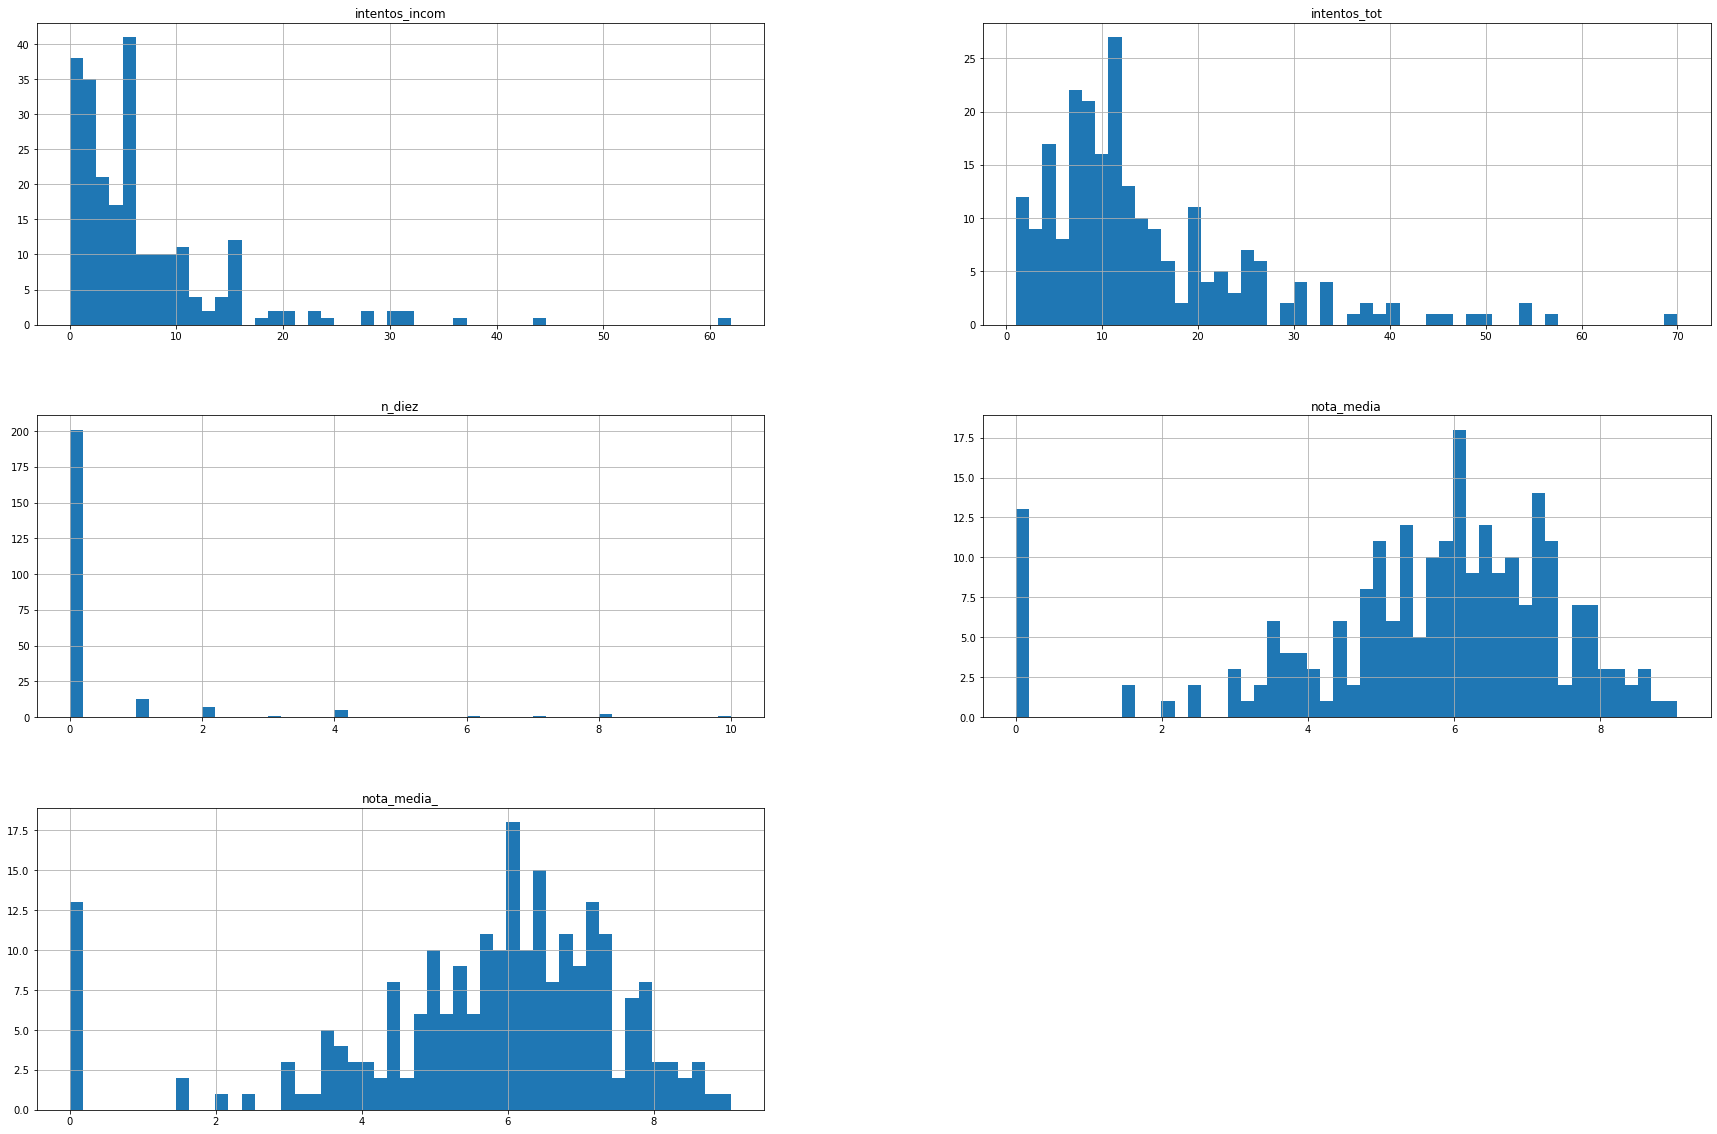

In [21]:
dataF.hist(bins=50, figsize=(30,20));


En estos gráficos podemos observar como se encuentran distribuidos los diferentes valores de cada una las variables. En el caso de los intentos totales e intentos incompletos, los datos estas distribuidos más hacia la izquierda (cerca del cero). 
El número de estudiantes que obtuvieron 10 son pocos, predominando aquellos que obtuvieron notas menores.
En el caso de la nota media y la nota media sin contar los valores 0, los datos estan distribuidos de manera similar lo que nos indica a primera vista, que no existe mucha diferencia entre estas dos variables. 

Los intentos incompletos resaltan en todas las variables. 

## Análisis bivariante

Para analizar un conjunto de datos debemos tener en cuenta más de una variable a la vez. El análisis bivariante permite identificar las relaciones entre dos variables, y hasta ver de qué forma una puede predecir la otra. 

Veamos la relación entre el la nota media y la nota media sin contar los ceros

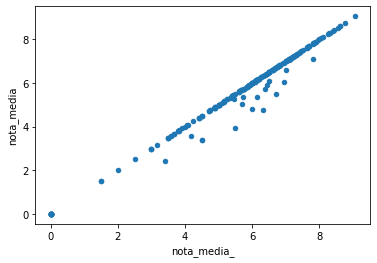

In [22]:
var = 'nota_media_'
data = pd.concat([dataF['nota_media'], dataF[var]], axis=1)
data.plot.scatter(x=var, y='nota_media')

Ahora, los intentos totales con la cantidad de diez

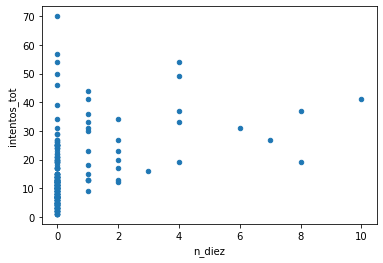

In [24]:
var = 'n_diez'
data = pd.concat([dataF['intentos_tot'], dataF[var]], axis=1)
data.plot.scatter(x=var, y='intentos_tot')

Por último, los intentos incompletos con los intentos totales

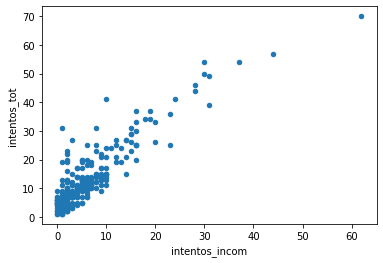

In [26]:
var = 'intentos_incom'
data = pd.concat([dataF['intentos_tot'], dataF[var]], axis=1)
data.plot.scatter(x=var, y='intentos_tot')

## Análisis multivariante

Finalmente, nos interesa ver como estan las variables relacionadas entre sí. Para ello, usaremos técnicas estadísticas de análisis multivariante.

Una de las herramientas más útiles es calcular la matriz de correlación entre las variables. Con la función `heatmap` podemos visualizar de manera sencilla aquellas variables más correlacionadas, que corresponden a una intensidad mayor de color.

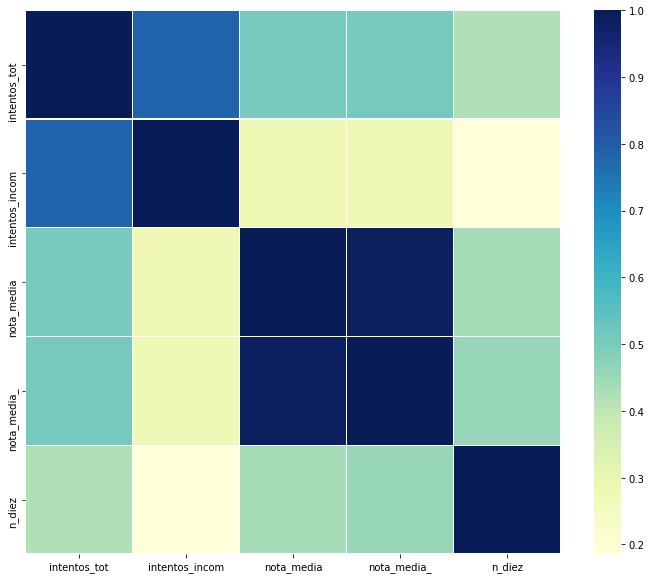

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

corrmat = dataF.corr(method='spearman')
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corrmat, ax=ax, cmap="YlGnBu", linewidths=0.1)

In [ ]:
Podemos observar que las variables nota_media y la nota_media_ (sin contar las notas=0) tienen una alta correlación. 
De igual manera, existe una correlación aunque con menor intensidad entre las variables intentos_incom e intentos_tot

<!--Footer-->
 <div style="background: #333333;padding: 35px 0px;margin-top: 25px;">
    <div class="row">
     <div class="col-sm-12">
        <img src="http://materials.cv.uoc.edu/cdocent/common/img/logo-uoc-bottom.png" alt="Logo UOC" class="img-responsive" style="margin: 0 auto; display: block;">
    </div>
</div>
</div>
<!--/Footer-->